### Exploratory Data Analysis

### Data Pre-Processing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.



*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket



In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.


*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match KKR VS CSK?

In [13]:
# Lets check winning ratio between KKR VS CSK
df_KKR_CSK = df_matches[((df_matches['team1'] == 'Kolkata Knight Riders') | (df_matches['team1'] == 'Chennai Super Kings')) & 
                         ((df_matches['team2'] == 'Kolkata Knight Riders') | (df_matches['team2'] == 'Chennai Super Kings'))] 

#plotting KKR and CSK wins against each other
import plotly.graph_objs as go
df_winner = df_KKR_CSK[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KKR and CSK against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

CSK won more matches than KKR in head-head matches.

In [16]:
#IPL team will change every two years 
#As per my cricket knowldge last Mega Auction was happened in 2018. 
#So lets look at last 2 years performance by KKR and CSK(2018 and 2019)
# Lets check winning ratio between KKR VS CSK
df_KKR_CSK_18_19 = df_matches[((df_matches['team1'] == 'Kolkata Knight Riders') | (df_matches['team1'] == 'Chennai Super Kings') |
                              (df_matches['team2'] == 'Kolkata Knight Riders') | (df_matches['team2'] == 'Chennai Super Kings')) &
                              (df_matches['season'] >= 2018)] 

#plotting KKR and CSK all wins in 2018 and 2019 seasons
import plotly.graph_objs as go
df_winner = df_KKR_CSK_18_19[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of total wins by KKR and CSK in 2018-19',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()


**Cocnclusion :-**

In last 2 seasons also CSK won more matches than KKR. So i am predicting CSK will win today match.

### Q2) How many balls more/less will KKR take to reach a team total of 75 as compared to CSK? 

In [ ]:
#First i am taking KKR vs CSK matches.
#Than calculating Number of balls take to reach 75 runs in each match by both teams.
#Now i am filtering KKR batting against MI.
df_KKRbatting = df_deliveries[(df_deliveries['batting_team'] == 'Kolkata Knight Riders') & (df_deliveries['bowling_team'] == 'Chennai Super Kings')]
                          
#converting total_runs,match id, wide_runs and no-balls into list
total_runs_list = df_KKRbatting['total_runs'].tolist()
match_id_list = df_KKRbatting['match_id'].tolist()
wideballs_list = df_KKRbatting['wide_runs'].tolist()
noballs_list = df_KKRbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

KKR_ballsfaced = []
KKR_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls_faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in KKR_matchID and run<75:
        KKR_ballsfaced.append('NA')  #here 'NA' means KKR didnt scored 75 runs in a match.
        KKR_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in KKR_matchID:   
        if run >= 100:
           KKR_ballsfaced.append(balls_faced)
           KKR_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 75 runs by KKR:",KKR_ballsfaced,'\n')
print("Corresponding Match_Id             :",KKR_matchID)



Balls faced to reach 75 runs by KKR: [89, 90, 70, 100, 99, 83, 'NA', 90, 71, 59, 102, 75, 92, 75, 81, 101, 69, 62, 120, 73] 

Corresponding Match_Id             : [71, 103, 166, 182, 222, 235, 281, 347, 368, 381, 406, 418, 478, 504, 527, 547, 7898, 7926, 11314, 11320]


In [ ]:
#Now i am filtering CSK batting against KKR
df_CSKbatting = df_deliveries[(df_deliveries['batting_team'] == 'Chennai Super Kings') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')]

#converting total_runs,match id and wide_runs, no-balls into list
total_runs_list = df_CSKbatting['total_runs'].tolist()
match_id_list = df_CSKbatting['match_id'].tolist()
wideballs_list = df_CSKbatting['wide_runs'].tolist()
noballs_list = df_CSKbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

CSK_ballsfaced = []
CSK_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in CSK_matchID and run<100:
        CSK_ballsfaced.append('NA')  #here NA means mumbai didnt scored 100 runs in a match.
        CSK_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in CSK_matchID:   
        if run >= 100:
           CSK_ballsfaced.append(balls_faced)
           CSK_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 75 runs by CSK:",CSK_ballsfaced,'\n')
print("Corresponding Match_Id             :",CSK_matchID)

Balls faced to reach 75 runs by CSK: [80, 'NA', 74, 94, 59, 86, 111, 93, 69, 71, 104, 57, 70, 85, 70, 91, 66, 68, 99, 81] 

Corresponding Match_Id             : [71, 103, 166, 182, 222, 235, 281, 347, 368, 381, 406, 418, 478, 504, 527, 547, 7898, 7926, 11314, 11320]


By looking at above balls faced lists CSK has not reached 75 runs once and KKR also not reached 75 runs one time.

In [ ]:
#converting above lists into dataframes 
df_KKR_ballsfaced =  pd.DataFrame(list(zip(KKR_matchID, KKR_ballsfaced)), columns =['match_id', 'balls_faced_KKR']) 
df_CSK_ballsfaced =  pd.DataFrame(list(zip(CSK_matchID, CSK_ballsfaced)), columns =['match_id', 'balls_faced_CSK']) 

#Merging KKR and CSK ballsfaced dataframes on match_id
df_KKRvsCSK = pd.merge(df_KKR_ballsfaced, df_CSK_ballsfaced, left_on='match_id',right_on='match_id', how='outer')

#Here i am taking only matches where both teams crossed 75 runs
df_KKRvsCSK = df_KKRvsCSK[(df_KKRvsCSK.balls_faced_KKR != 'NA') & (df_KKRvsCSK.balls_faced_CSK != 'NA')]
df_KKRvsCSK['difference_in_balls'] = abs(df_KKRvsCSK['balls_faced_KKR'] - df_KKRvsCSK['balls_faced_CSK'])
df_KKRvsCSK.head(2)

,match_id,balls_faced_KKR,balls_faced_CSK,difference_in_balls
0,71,89,80,9
2,166,70,74,4


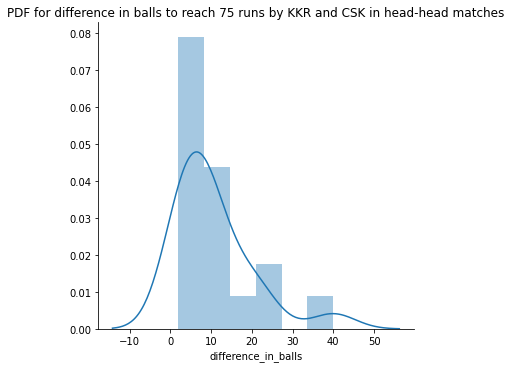

In [ ]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_KKRvsCSK,size=5) \
   .map(sns.distplot, "difference_in_balls") \
   .add_legend();

plt.title("PDF for difference in balls to reach 75 runs by KKR and CSK in head-head matches")
plt.show();


**Conclusion :-**

According above probability density function plot from balls between 5 to 9 the pobability is very high.

So i am predicting in today match also the balls diffrence to reach 75 runs is lies between 5 to 10. From given options i am choosing 0 to 7.

### Q3) How many balls will deepak chahar take, to get his first wicket?

In [17]:
#Filtering deepak chahar all matches in IPL
df_chahar = df_deliveries[(df_deliveries['bowler'] == 'DL Chahar')]

#Now filtering matches where chahar got atleast 1 wicket in a match
df_chahar_wickets = df_chahar[(df_chahar['player_dismissed'] != 'No Wicket') & (df_chahar['dismissal_kind'] != 'run out')]

total_matches = df_chahar['match_id'].nunique()
matches_with_1wicket = df_chahar_wickets['match_id'].nunique()

print("Number of matches played by deepak chahar in IPL is : ", total_matches,'\n')
print("Number of matches deepak chahar got atleast 1 wicket in match is : ", matches_with_1wicket)

Number of matches played by deepak chahar in IPL is :  34 

Number of matches deepak chahar got atleast 1 wicket in match is :  22


In [18]:
#Filtering out Chahar balls excluding No balls and wide balls
#I know runouts cant count in bowlers wickets but in chahar bowling very few batsman got runout.

df_Chahar = df_deliveries[(df_deliveries['bowler'] == 'DL Chahar') & (df_deliveries['wide_runs'] == 0)
                                                                     & (df_deliveries['noball_runs'] == 0)]

balls_list = df_Chahar['ball'].to_list()
wickets_list = df_Chahar['player_dismissed'].to_list()
matchid_list = df_Chahar['match_id'].to_list()

listoflists = []
listoflists.append(matchid_list)
listoflists.append(balls_list)
listoflists.append(wickets_list)

Chahar_balls_bowled = []
Chahar_matchID = []
balls_bowled = 0

for i in range(len(listoflists[0])-1):
     balls_bowled = balls_bowled + 1
     if listoflists[0][i] != listoflists[0][i-1]:
        balls_bowled = 0
     if listoflists[0][i] not in Chahar_matchID and listoflists[2][i] != 'No Wicket':   
            Chahar_balls_bowled.append(balls_bowled+1)
            Chahar_matchID.append(listoflists[0][i])
            balls_bowled = 0
            
#Printing number of balls bowled by Rasid khan in each match for getting his first wicket
print("Chahar balls bowled for 1st wicket  =",Chahar_balls_bowled)
print("Corresponding Matchid           =",Chahar_matchID)


Chahar balls bowled for 1st wicket  = [1, 7, 12, 5, 9, 13, 11, 1, 15, 2, 9, 24, 6, 11, 16, 9, 24, 10, 5, 2, 9, 14]
Corresponding Matchid           = [9, 7894, 7910, 7913, 7939, 7945, 7949, 7950, 11141, 11148, 11151, 11309, 11314, 11316, 11324, 11330, 11332, 11335, 11341, 11412, 11414, 11415]


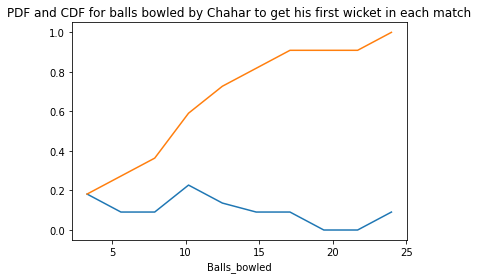

count    22.000000
mean      9.772727
std       6.369061
min       1.000000
25%       5.250000
50%       9.000000
75%      12.750000
max      24.000000
Name: balls_bowled_1stwicket, dtype: float64


In [22]:
#Converting above two lists into dataframe
df_Chahar_ballsbowled_1stwicket =  pd.DataFrame(list(zip(Chahar_matchID, Chahar_balls_bowled)), columns =['match_id', 'balls_bowled_1stwicket']) 

import numpy as np
import matplotlib.pyplot as plt
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_Chahar_ballsbowled_1stwicket['balls_bowled_1stwicket'], bins=10,
                                density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("PDF and CDF for balls bowled by Chahar to get his first wicket in each match")
plt.xlabel('Balls_bowled')
plt.show();

print(df_Chahar_ballsbowled_1stwicket['balls_bowled_1stwicket'].describe())

**Conclusion :-**



1.   
According to above analysis he played 34 matches in IPL out of 34 he taken atleast 1 wicket in 22 matches. 12 matches he didnt got the wicket.
2.   Out of those 22 matches 75% of the times he got his 1st wickets before 12th ball only.

So according to above analysis he didnt got the wicket 12 matches out of 34. So 12 is not a small number. So i am predicting in today match also he dont take any wicket.



### Q4) How many such overs will be there in a match where 6 and 4 are scored in same over?

In [ ]:
#I am filtering  KKR and CSK matches
df_KKR_CSK = df_deliveries[((df_deliveries['batting_team'] == 'Kolkata Knight Riders') | (df_deliveries['batting_team'] == 'Chennai Super Kings')) & 
                          ((df_deliveries['bowling_team'] == 'Kolkata Knight Riders') | (df_deliveries['bowling_team'] == 'Chennai Super Kings'))] 
                                 
df_KKR_CSK = df_KKR_CSK[['match_id','inning','over','batsman_runs']]
df_4s6s_over = df_KKR_CSK[(df_KKR_CSK['batsman_runs'] == 4) | (df_KKR_CSK['batsman_runs'] == 6)]

In [ ]:
import numpy as np
#creating 2 more colums i.e 4s and 6s. If batsman hits 4 then i am filling 4s column with 1 or 0. 
df_4s6s_over['4s'] = np.where(df_4s6s_over.batsman_runs == 4, 1, 0)
df_4s6s_over['6s'] = np.where(df_4s6s_over.batsman_runs == 6, 1, 0)
df_4s6s_over.head()

,match_id,inning,over,batsman_runs,4s,6s
16473,71,1,1,4,1,0
16477,71,1,2,4,1,0
16478,71,1,2,6,0,1
16479,71,1,2,4,1,0
16482,71,1,3,6,0,1


In [ ]:
df_match_wise_overs = df_4s6s_over.groupby(['match_id','inning','over'])['4s','6s'].apply(lambda x : x.astype(int).sum())
df.head()

4s  6s
match_id inning over        
71       1      1      1   0
                2      2   1
                3      0   1
                4      1   0
                5      3   0

In [ ]:
dfd = df_match_wise_overs[(df_match_wise_overs['4s'] >= 1) & (df_match_wise_overs['6s'] >=1)]

print("Number overs gone for atleast one 4 and one 6 is :",dfd.shape[0], "\n")
print("Number of matches they played is : ",df_KKR_CSK['match_id'].nunique(), '\n')

print("Average number of overs gone for atlest one 4 and one 6 in a match is :", int(dfd.shape[0]/df_KKR_CSK['match_id'].nunique()),"overs")

Number overs gone for atleast one 4 and one 6 is : 80 

Number of matches they played is :  20 

Average number of overs gone for atlest one 4 and one 6 in a match is : 4 overs


**Conclusion :-**

According to above analysis in KKR VS CSK matches atleast on an average 4 overs gone one six and one four.

So i am predicting in today match also they will score one four and one six in 3-4 overs.

### Q5) How many no-balls will be bowled in the match?

In [ ]:
#Taking CSK vs KKR matches
df_KKRvsCSK = df_deliveries[(df_deliveries['batting_team'] == 'Chennai Super Kings') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')|
                            (df_deliveries['batting_team'] == 'Chennai Super Kings') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')]

# Calcualting no-balls in each CSK vs KKR match.
noballs_permatch = df_KKRvsCSK.groupby('match_id')['noball_runs'].sum()

noballs_permatch.describe() 

count    20.000000
mean      0.400000
std       0.680557
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: noball_runs, dtype: float64

**Conclusion :-**

In total 20 matches between CSK vs KKR the average of no-balls i.e Mean, Median is 0 and 75% of values are also less than 1.

So according to above observation in today match also they will bowl 0-1 no-ball.